# Building a wordcloud based on one year of bulletins

## Créer un fichier contenant les bulletins d'une année donnée

In [37]:
# Choisir une année

YEAR = 1935

In [38]:
# Lister les fichiers de cette année

from os import listdir
from os.path import isfile, join

data_path = '../data/'
txt_path = '../data/hopitaux/1935v2/'
txts = [f for f in listdir(txt_path) if isfile(join(txt_path, f)) and str(YEAR) in f]
txts

['Bxl_1935_Tome_I_Part_6.txt', 'Bxl_1935_Tome_I_Part_5.txt']

In [39]:
# Stocker le contenu de ces fichiers dans une liste

content_list = []
for txt in txts:
    with open(f'{txt_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

In [40]:
# Vérifier le nombre de contenus collectés

len(content_list)

2

In [41]:
# Imprimer les 200 premiers caractères du contenu du premier fichier

content_list[0][:200]

'NATURE\n\nDES\n\nDÉPENSES.\n\n8* SECTION. — HOSPICE DES ORPHELINES ET DES ENFANTS ASSISTÉS.\n\n§ 1. — Frais\n\nde\n\nlocaux.\n\nEntretien des b â t i m e n t s :\nHospice des Orphelines\nSection des Entants assistés\n'

In [42]:
# Ecrire tout le contenu dans un fichier

with open(f'../data/{YEAR}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Enlever les stopwords, les mots courts et non alphabétiques et stocker le résultat dans un nouveau fichier

In [43]:
# Imprimer le contenu du fichier et constater les "déchets"

with open(f'../data/{YEAR}.txt', 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"NATURE\n\nDES\n\nDÉPENSES.\n\n8* SECTION. — HOSPICE DES ORPHELINES ET DES ENFANTS ASSISTÉS.\n\n§ 1. — Frais\n\nde\n\nlocaux.\n\nEntretien des b â t i m e n t s :\nHospice des Orphelines\nSection des Entants assistés\nPrimes d'assurance contre l'incendie :\nHospice des Orphelines .\nSection des Enfants a s s i s t é s\n§ 2. — Service\n\nadministratif.\n\nTraitement du personnel administratif :\nHospice des Orphelines\nSection des Enfants a s s i s t é s\nTraitement du personnel éducatif :\nHospice des Orphelines\nSection des"

In [44]:
import sys
import nltk
from nltk.corpus import stopwords

In [45]:
# Appliquer la fonction filtering (que vous pouvez customiser)

from filtering import filtering

filtering(YEAR, folder='../data')

'Output has been written in ../data/1935_keywords.txt!'

In [46]:
# Vérifier le résultat

with open(f'../data/{YEAR}_keywords.txt', 'r') as f:
    after = f.read()

after[:500]

'nature dÃ©penses section hospice orphelines enfants assistÃ©s frais locaux entretien hospice orphelines section entants assistÃ©s primes assurance incendie hospice orphelines section enfants administratif traitement personnel administratif hospice orphelines section enfants traitement personnel Ã©ducatif hospice orphelines section enfants assistÃ©s salaire personnel subalterne hospice orphelines section enfants assistÃ©s frais bureau hospice orphelines section entants assistÃ©s mÃ©dical traiteme'

## Créer le word cloud

In [47]:
import subprocess

command = [
    'wordcloud_cli',
    '--text', f'../data/{YEAR}_keywords.txt',
    '--imagefile', f'../data/{YEAR}.png',
    '--width', '2000',
    '--height', '1000',
]

subprocess.run(command, capture_output=True)

CompletedProcess(args=['wordcloud_cli', '--text', '../data/1935_keywords.txt', '--imagefile', '../data/1935.png', '--width', '2000', '--height', '1000'], returncode=0, stdout=b'', stderr=b'')

## Afficher le word cloud

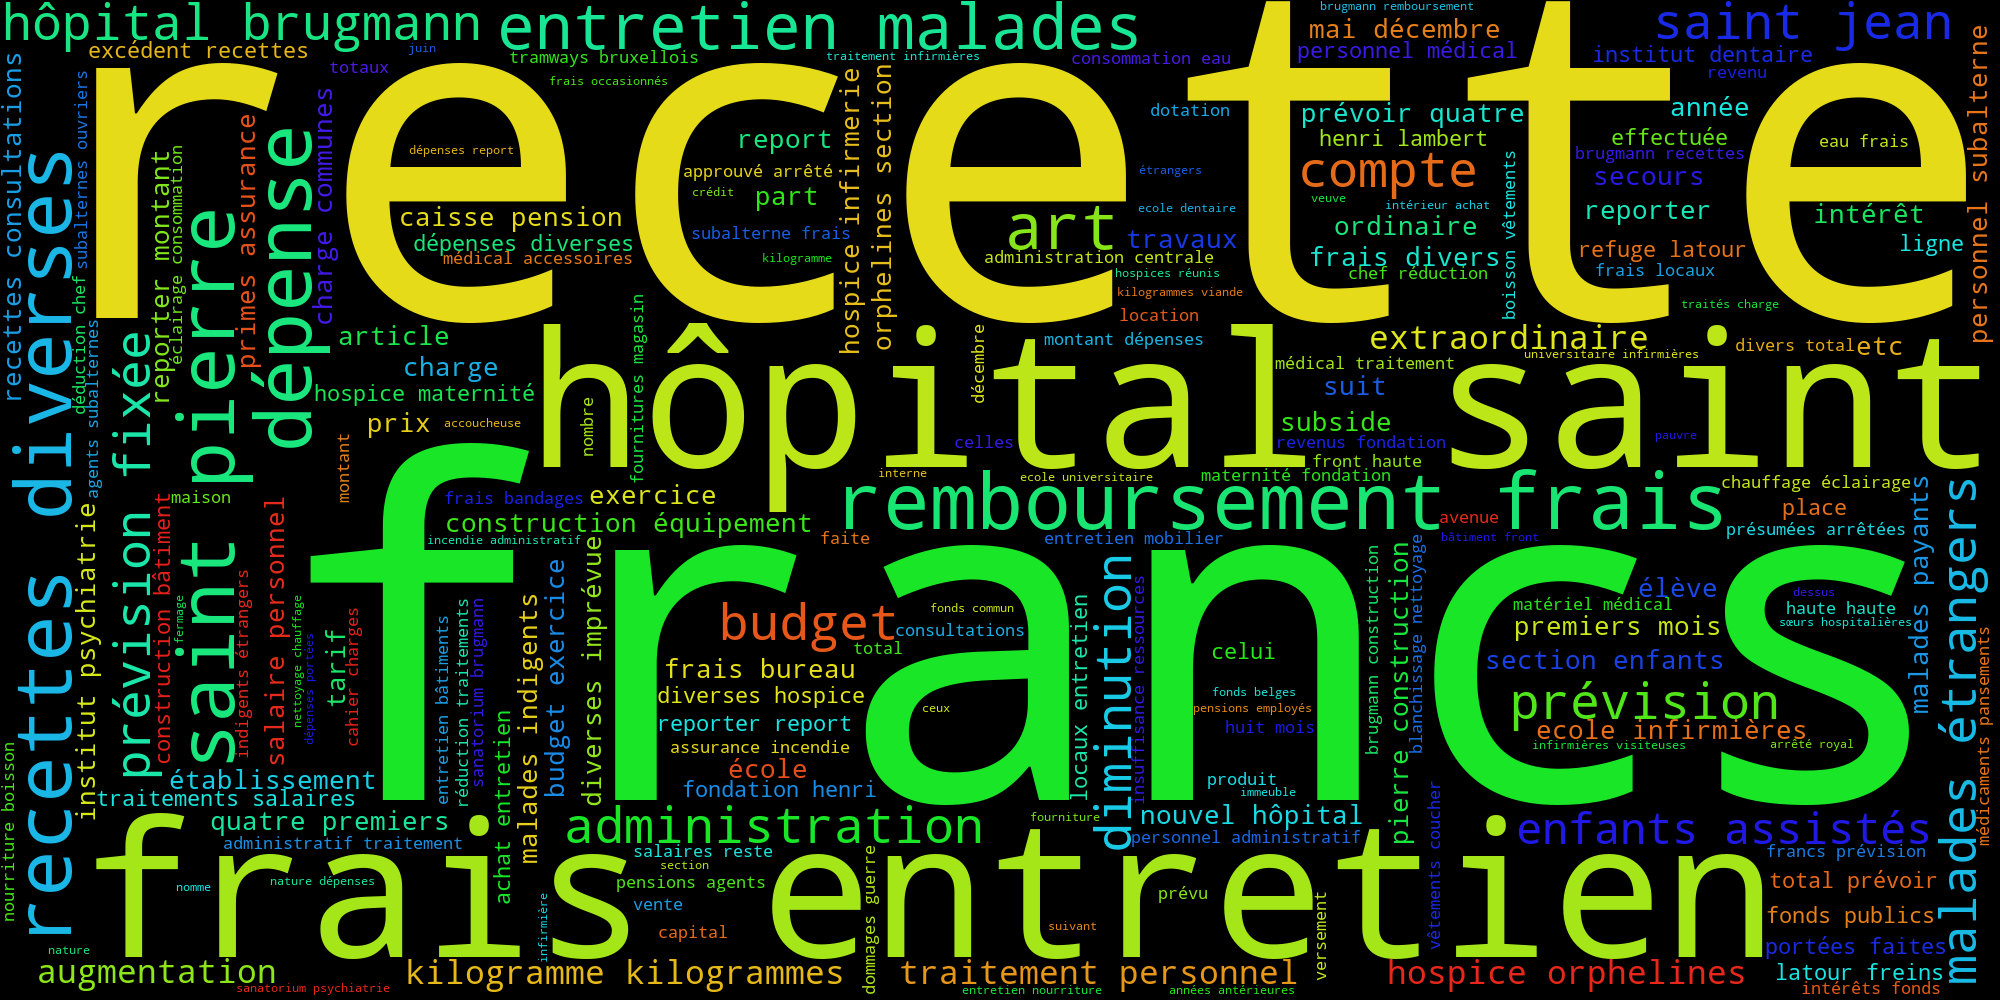

In [48]:
from IPython.display import Image
Image(filename=f'../data/{YEAR}.png')